In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Reading the dataset

In [33]:
# Read data

df_adv = pd.read_csv('Advertising.csv')

In [21]:
# Get a subset of the data row 5 to 13 and only TV advertisement
data_x = df_adv.TV[5:13]
data_y = df_adv.sales[5:13]

# Sort the data
idx = np.argsort(data_x).values # Get indices ordered from lowest to highest values

# Get the actual data in the order from above
data_x  = data_x.iloc[idx].values
data_y  = data_y.iloc[idx].values

In [26]:
### edTest(test_findnearest) ###
# Define a function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  Note that this 
# is just for k = 1 and the distance function is simply the 
# absolute value.
def find_nearest(array,value):
    idx = pd.Series(np.abs(array-value)).idxmin()
    return idx, array[idx]

In [27]:
# Create some artificial x-values (might not be in the actual dataset)
x = np.linspace(np.min(data_x), np.max(data_x))

# Initialize the y-values to zero
y = np.zeros( (len(x)))

In [28]:
# Apply the KNN algorithm.  Try to predict the y-value at a given x-value
# Note:  You may have tried to use the `range' method in your code.  Enumerate 
# is far better in this case.  Try to understand why.
for i, xi in enumerate(x):
    y[i] = data_y[find_nearest( data_x, xi )[0]]

### Plotting the data

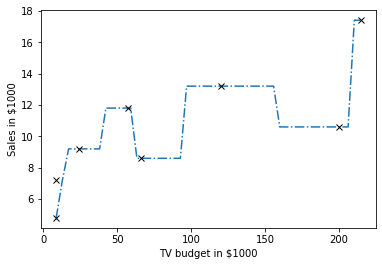

In [29]:
# Plot your solution    
plt.plot(x,y, '-.')
# Plot the original data using black x's.
plt.plot(df_adv.TV[5:13], df_adv.sales[5:13], 'kx')
plt.title('')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

# Save the figure if savefig=True

## Sklearn package - KNN

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [34]:
### Reading the complete Advertising dataset

# Data set used in this exercise
data_filename = 'Advertising.csv'

# Read advertising.csv file using the pandas library (using pandas.read_csv)
df = pd.read_csv(data_filename)

#Selecting the predictor and response variables
X = df[['TV']]
y = df['sales']

In [35]:
### Train-Test split

### edTest(test_shape) ###
#print (X[1])
# Split the dataset in training and testing with 60% training set and 40% testing set 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [36]:
### edTest(test_nums) ###
# Choosing k range 
k_value_min = 1
k_value_max = 70

# creating list of integer k values betwwen k_value_min and k_value_max using linspace
k_list = np.linspace(k_value_min, k_value_max, 70)

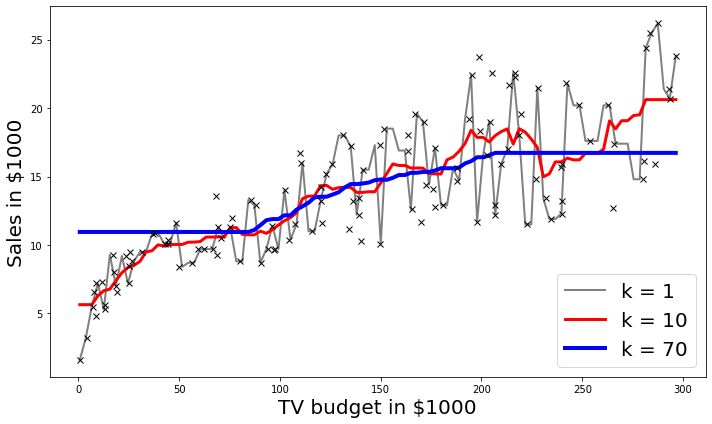

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
j=0
# Looping over k values
for k_value in k_list:   
    
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # fitting model 
    model.fit(X_train,y_train)
    
    # predictions
    y_pred = model.predict(X_test)
    
    ## Plotting
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(X.min(),X.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(X_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()